In [306]:
import numpy as np 
from scipy.fftpack import fft,ifft 
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt 
from matplotlib.pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei'] #顯示中文 
mpl.rcParams['axes.unicode_minus']=False #顯示負號


In [307]:
fs = 48000

In [308]:
def cal_amplitude(wave):
    return np.sum(np.absolute(wave)*100)

In [309]:
def get_FFT(y,N):
    fft_y=fft(y) #快速傅立葉變換 
    x = np.arange(N) # 頻率個數 
    half_x = x[range(int(N/2))] #取一半區間 
    abs_y=np.abs(fft_y) # 取複數的絕對值，即複數的模(雙邊頻譜) 
    normalization_y=abs_y/N #歸一化處理（雙邊頻譜） 
    normalization_half_y = normalization_y[range(int(N/2))] #由於對稱性，只取一半區間（單邊頻譜）

    return half_x,normalization_half_y

In [310]:
def FFT(y,N):
    fft_y=fft(y) #快速傅立葉變換 
    x = np.arange(N) # 頻率個數 
    half_x = x[range(int(N/2))] #取一半區間 
    abs_y=np.abs(fft_y) # 取複數的絕對值，即複數的模(雙邊頻譜) 
    angle_y=np.angle(fft_y) #取複數的角度 
    normalization_y=abs_y/N #歸一化處理（雙邊頻譜） 
    normalization_half_y = normalization_y[range(int(N/2))] #由於對稱性，只取一半區間（單邊頻譜）
    plt.plot(half_x,normalization_half_y,'blue') 
    plt.title('單邊振幅譜(歸一化)',fontsize=9,color='blue') 

    plt.show()

    return half_x,normalization_half_y

In [311]:
N=10000
x=np.linspace(0,1,N)
y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x) + 3*np.sin(2*np.pi*600*x)
#y=7*np.sin(2*np.pi*2399*x)
#z = -7*np.sin(2*np.pi*2399*x+0.005)
#y = z + y

/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge

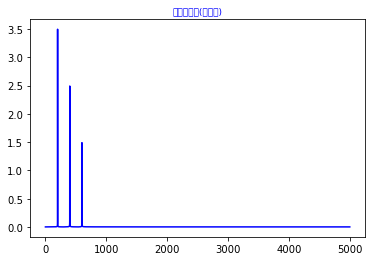

In [312]:
half_x, normalization_half_y = FFT(y,N)

In [313]:
tmp_ = read('tutorial1/new_fan_record.wav')
fanrecording = np.array(tmp_[1],dtype=np.float32)

adjust_x = np.linspace(0,1,960000)
adjust_y=-0.0021*np.sin(2*np.pi*578*adjust_x)
#fanrecording = 7*np.sin(2*np.pi*200*adjust_x) + 5*np.sin(2*np.pi*400*adjust_x) + 3*np.sin(2*np.pi*600*adjust_x)
#fanrecording = fanrecording + adjust_y

In [314]:
cal_amplitude(fanrecording)

505282.88

In [315]:
f_N=10000
f_x=np.linspace(0,1,f_N)
#y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x) + 3*np.sin(2*np.pi*600*x)

/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge

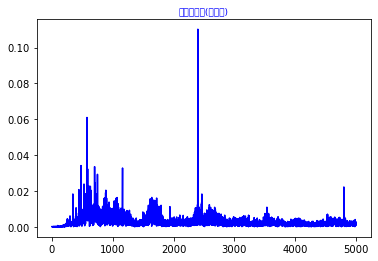

In [316]:
half_x,normalization_half_y = FFT(fanrecording,f_N)

In [317]:
Threshold = 0.0075
noise_list = []
for index,y in enumerate(normalization_half_y):
    if(y>Threshold):
        print(index,y)
        noise_list.append(index)

346 0.018368222
396 0.008174062
399 0.010675441
440 0.0077635017
445 0.020811206
466 0.013257046
467 0.010552028
468 0.008216798
472 0.010414309
477 0.007824636
479 0.0117266895
480 0.03421694
487 0.007890211
493 0.00912364
494 0.0076493323
502 0.008094823
515 0.009896244
525 0.01230219
526 0.013897635
528 0.009133081
529 0.023905715
538 0.009617639
539 0.009135658
542 0.00884285
544 0.014306033
545 0.010969413
551 0.009470827
552 0.00854851
555 0.009670868
556 0.018509252
558 0.008275591
561 0.009224264
564 0.010017474
566 0.0077351243
568 0.014539491
570 0.013889353
571 0.008249232
573 0.0122342715
574 0.013252901
575 0.0120070465
576 0.022345323
577 0.022389334
578 0.061016932
579 0.025433633
580 0.020203797
581 0.014653916
582 0.012497189
583 0.014406996
585 0.013317215
586 0.017252132
587 0.012059635
588 0.009016066
589 0.032301314
591 0.015860189
592 0.008457448
594 0.020958541
596 0.010355218
597 0.022078767
598 0.013880618
600 0.010889892
601 0.013038963
603 0.013679338
604 0.0

In [318]:
def Find_min_amp(record,freq,shift):

    adjust_x = np.linspace(0,1,record.shape[0])
    dir = -1
    #for amp in np.arange(3,0.,-0.1):
    for amp in np.arange(0.003,0.,-0.0001):
        adjust_y=-amp*np.sin(2*np.pi*freq*adjust_x+shift)
        half_x,normalization_half_y = get_FFT(record+adjust_y,f_N)
        #print(normalization_half_y[freq])
        if(amp!=0.003):
            if(pre_y<normalization_half_y[freq]):
                if(dir == 0):
                    print('Freq:', freq ,' Min shift:',shift,' Min amp:',pre_amp,' Min y:',pre_y)
                    return amp
                dir = 1
            else:
                dir = 0

        pre_y = normalization_half_y[freq]
        pre_amp = amp
    print('Freq:', freq ,' Min shift:',shift,' Min amp:',pre_amp,' Min y:',pre_y)
    return pre_amp

In [319]:
def Find_min_shift(record,freq):
    adjust_x = np.linspace(0,1,record.shape[0])
    dir = -1
    for shift in np.arange(0.,10.,0.02):
        adjust_y=-0.00001*np.sin(2*np.pi*freq*adjust_x+shift)
        half_x,normalization_half_y = get_FFT(record+adjust_y,f_N)
        #print(normalization_half_y[freq])
        if(shift!=0):
            if(pre_y<normalization_half_y[freq]):
                if(dir == 0):
                    print('Freq:', freq ,' Min shift:',pre_shift,' Min y:',pre_y)
                    return pre_shift
                dir = 1
            else:
                dir = 0

        pre_y = normalization_half_y[freq]
        pre_shift = shift
#Find_min_shift(fanrecording,2399)
shift_dict = {}
amp_dict = {}
for noice_freq in noise_list:
    shift_dict[noice_freq] = Find_min_shift(fanrecording,noice_freq)
    amp_dict[noice_freq] = Find_min_amp(fanrecording,noice_freq,shift_dict[noice_freq])
print(shift_dict)
print(amp_dict)

Freq: 346  Min shift: 3.86  Min y: 0.017888226017319032
Freq: 346  Min shift: 3.86  Min amp: 0.0004000000000000045  Min y: 0.000835435731255733
Freq: 396  Min shift: 0.14  Min y: 0.007694061023889994
Freq: 396  Min shift: 0.14  Min amp: 0.00020000000000000486  Min y: 0.0014259429997325692
Freq: 399  Min shift: 3.58  Min y: 0.01019544529077948
Freq: 399  Min shift: 3.58  Min amp: 0.00020000000000000486  Min y: 0.0010764937282827815
Freq: 440  Min shift: 0.86  Min y: 0.007283503559425791
Freq: 440  Min shift: 0.86  Min amp: 0.00020000000000000486  Min y: 0.0018366681229445448
Freq: 445  Min shift: 3.46  Min y: 0.02033120564691936
Freq: 445  Min shift: 3.46  Min amp: 0.0004000000000000045  Min y: 0.0016112202156778725
Freq: 466  Min shift: 2.72  Min y: 0.012777055633462308
Freq: 466  Min shift: 2.72  Min amp: 0.0003000000000000047  Min y: 0.0011458518579757324
Freq: 467  Min shift: 4.5  Min y: 0.010072028440357947
Freq: 467  Min shift: 4.5  Min amp: 0.00020000000000000486  Min y: 0.000952

In [320]:
'''for amp in np.arange(0.003,0.,-0.000005):
        adjust_y=amp*np.sin(2*np.pi*2399*adjust_x+1.9000000000000001)
        half_x,normalization_half_y = get_FFT(fanrecording+adjust_y,f_N)

        print(normalization_half_y[2399])'''
#adjust_y=0.0004*np.sin(2*np.pi*2400*adjust_x+1.9000000000000001)
half_x,normalization_half_y = get_FFT(fanrecording+adjust_y,f_N)
print(normalization_half_y[2400])

0.07779584433035931


/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge

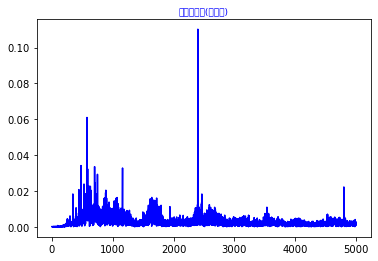

346 3.86 0.0003000000000000047
396 0.14 0.00010000000000000503
399 3.58 0.00010000000000000503
440 0.86 0.00010000000000000503
445 3.46 0.0003000000000000047
466 2.72 0.00020000000000000486
467 4.5 0.00010000000000000503
468 3.2 0.00010000000000000503
472 0.32 0.00010000000000000503
477 4.42 0.00010000000000000503
479 1.2 0.00010000000000000503
480 5.22 0.0006000000000000042
487 3.34 0.00010000000000000503
493 6.2 0.00010000000000000503
494 3.86 0.00010000000000000503
502 2.14 0.00010000000000000503
515 5.54 0.00010000000000000503
525 0.3 0.00020000000000000486
526 2.72 0.00020000000000000486
528 4.16 0.00010000000000000503
529 1.8 0.0004000000000000045
538 3.86 0.00010000000000000503
539 2.36 0.00010000000000000503
542 3.04 0.00010000000000000503
544 1.6 0.00020000000000000486
545 4.72 0.00010000000000000503
551 5.66 0.00010000000000000503
552 5.22 0.00010000000000000503
555 3.54 0.00010000000000000503
556 0.96 0.0003000000000000047
558 0.62 0.00010000000000000503
561 1.86 0.000100000

/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37002 (\N{CJK UNIFIED IDEOGRAPH-908A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/audio_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge

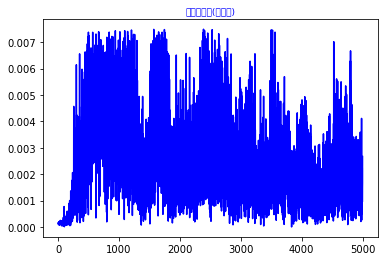

In [321]:

denoise = []
denoise = fanrecording
_,_ = FFT(fanrecording,f_N)
for freq in shift_dict:
    print(freq,shift_dict[freq],amp_dict[freq])
    denoise += -amp_dict[freq]*np.sin(2*np.pi*freq*adjust_x + shift_dict[freq])
half_x,normalization_half_y = FFT(denoise,f_N)
#_,_ = FFT(fanrecording,f_N)

In [322]:
Threshold = 0.06
for index,y in enumerate(normalization_half_y):
    if(y>Threshold):
        print(index,y)

In [323]:
write('denoise.wav', fs, denoise)  # Save as WAV file 

In [324]:
cal_amplitude(fanrecording-denoise)

0.0

In [325]:
cal_amplitude(denoise)

390066.34